1. Creating a pie chart presenting the male/female proportion


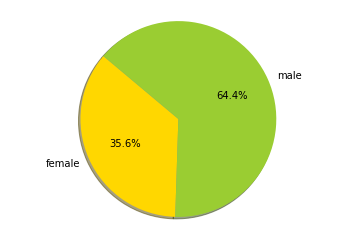

In [1]:
#TASK 1
#1. Create a pie chart presenting the male/female proportion


import matplotlib.pyplot as plt
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
Sex=titanic.groupby(titanic.sex).count()
Sex=Sex['name']
labels = 'female', 'male'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen']
explode = (0, 0,)  # explode 1st slice
 
# Plot
plt.pie(Sex, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
print("1. Creating a pie chart presenting the male/female proportion")
plt.show()


2.Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender


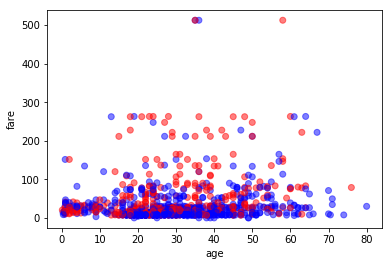

In [2]:
#2.Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender


print("2.Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender")
titanic = titanic.dropna(subset=['sex'])
mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

In [13]:
#TASK 2
#creating datframe
""" Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})"""


import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


In [14]:
#1. Some values in the the FlightNumber column are missing. These numbers are meant to
#increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
#numbers and make the column an integer column (instead of a float column).

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


In [15]:
#2. The From_To column would be better as two separate columns! Split each string on the
#underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
#correct column names to this temporary DataFrame.

df1=pd.DataFrame()
df1['from'] = df['From_To'].str.split('_').str[0]
df1['to'] = df['From_To'].str.split('_').str[1]

df1

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [16]:
#3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
#Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

df1['from']=df1['from'].str.capitalize()
df1['to']=df1['to'].str.capitalize()
df1

,from,to
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [17]:
#4. Delete the From_To column from df and attach the temporary DataFrame from the previous
#questions.

del df["From_To"]
df=pd.concat([df,df1],axis=1)
df

,Airline,FlightNumber,RecentDelays,from,to
0,KLM(!),10045,"[23, 47]",London,Paris
1,<Air France> (12),10055,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10075,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


In [20]:
""" 
5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays."""



tDelay = pd.DataFrame(df.RecentDelays)
tDelay = pd.DataFrame(df['RecentDelays'].values.tolist())
tDelay.columns = ['Delay_1', 'Delay_2', 'Delay_3']

df = df.drop('RecentDelays', 1)
df.insert(3, "Delay_1", tDelay['Delay_1'])
df.insert(4, "Delay_2", tDelay['Delay_2'])
df.insert(5, "Delay_3", tDelay['Delay_3'])
df

,Airline,FlightNumber,from,Delay_1,Delay_2,Delay_3,to
0,KLM(!),10045,London,23.0,47.0,NaN,Paris
1,<Air France> (12),10055,Madrid,NaN,NaN,NaN,Milan
2,(British Airways. ),10065,London,24.0,43.0,87.0,Stockholm
3,12. Air France,10075,Budapest,13.0,NaN,NaN,Paris
4,"""Swiss Air""",10085,Brussels,67.0,32.0,NaN,London
